# Model Scripts

### Imports

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Data Processing

In [29]:
raw_data = pd.read_csv("data.csv")
raw_data.sample(5)

,process_date,name,id,delivery_addr
9586,2018-05-15 16:46:21.876425,J,4742,4742@gmail.com
25535,2023-10-05 08:39:35.893877,Z,4732,4732@gmail.com
12551,2020-06-24 17:34:36.880058,M,4740,4740@gmail.com
15060,2023-05-18 23:51:21.882958,P,4740,4740@gmail.com
9567,2018-09-12 10:38:19.876425,J,4742,4742@gmail.com


In [58]:
df = raw_data
df["process_date"] = pd.to_datetime(raw_data["process_date"])
df.sort_values(by=["process_date"], inplace=True, ascending=True)
df

,process_date,name,id,delivery_addr
1946,2010-03-04 12:58:10.866849,B,4733,4733@gmail.com
1945,2010-03-11 11:52:35.866849,B,4733,4733@gmail.com
1944,2010-03-18 10:47:00.866849,B,4733,4733@gmail.com
1943,2010-03-25 09:41:25.866849,B,4733,4733@gmail.com
1942,2010-04-01 08:35:50.866849,B,4733,4733@gmail.com
...,...,...,...,...
23402,2024-05-10 14:38:35.891999,X,4733,4733@gmail.com
23808,2024-05-10 14:38:35.892407,Y,4739,4739@gmail.com
24440,2024-05-10 14:38:35.892993,Y,4745,4745@gmail.com
25257,2024-05-10 14:38:35.893877,Z,4732,4732@gmail.com


In [31]:
from datetime import datetime

START_DATE = datetime(year=2024, month=1, day=1)
END_DATE = datetime(year=2024, month=3, day=1)

events_raw = df.drop(columns=["id", "delivery_addr"])
restriction = (events_raw["process_date"] > START_DATE) & (events_raw["process_date"] < END_DATE)
sample = events_raw[restriction].sample(200)
sample

,process_date,name
618,2024-01-08 03:42:35.866135,A
25348,2024-02-29 04:03:05.893877,Z
17374,2024-02-11 22:09:35.885373,R
24067,2024-02-04 06:25:14.892407,Y
11355,2024-02-19 03:11:56.878388,K
...,...,...
16072,2024-01-08 04:00:29.884018,Q
2675,2024-02-26 17:49:50.868541,C
11327,2024-02-26 15:54:00.878388,K
23468,2024-01-18 20:34:11.891999,X


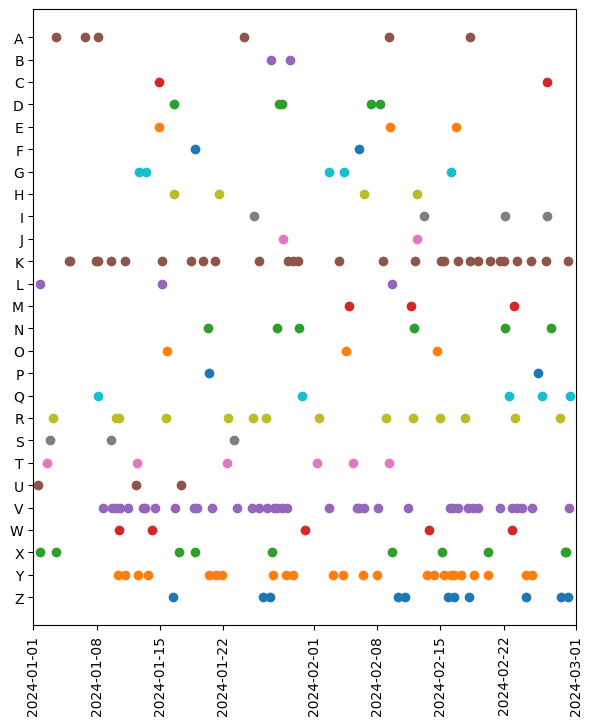

In [32]:
plt.figure(figsize=(7,8))
plt.xlim(START_DATE, END_DATE)
for name in reversed(events_raw["name"].unique()):
    points = sample[sample["name"] == name]
    plt.scatter(points["process_date"], points["name"])
plt.xticks(rotation=90)
plt.show()

In [46]:
events = pd.DataFrame(events_raw)

# One-hot encode name
events = pd.get_dummies(events, columns=["name"])

# Extract out elements of datetime
events["process_year"] = [date.year for date in events_raw["process_date"]]
events["process_month"] = [date.month for date in events_raw["process_date"]]
events["process_day"] = [date.day for date in events_raw["process_date"]]
events["process_hour"] = [date.hour for date in events_raw["process_date"]]
events["process_minute"] = [date.minute for date in events_raw["process_date"]]
events["process_second"] = [date.second for date in events_raw["process_date"]]
events.drop("process_date", axis=1, inplace=True)

events.sample(5)

,name_A,name_B,name_C,name_D,name_E,name_F,name_G,name_H,name_I,name_J,...,name_W,name_X,name_Y,name_Z,process_year,process_month,process_day,process_hour,process_minute,process_second
12916,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,2022,8,11,14,6,15
9425,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,2021,2,23,9,0,23
17832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,2022,4,5,22,44,13
8064,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,2020,5,23,0,13,7
5008,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,2019,4,6,15,57,35


In [54]:

from tslearn.clustering import TimeSeriesKMeans

Ns = []
SSEs = []

for n in range(10, 50):
    Ns.append(n)
    model = TimeSeriesKMeans(n_clusters=n, metric="dtw", n_jobs=-1)
    model.fit(events)
    SSEs.append(model.inertia_)
    print(f"Finished {n} clusters")

plt.plot(Ns, SSEs)
plt.title("N Clusters vs. Sum of Squared Errors")
plt.ylabel("Sum of squared errors")
plt.xlabel("N")
plt.show()

KeyboardInterrupt: 